In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/gdp .xlsx')
df

,Year,GDP Growth Rate,Number of Software Jobs Created,Number of Software Jobs Lost,Recession,Average Software Developer Salary,Annual GDP Change
0,2000,0.031,100000,50000,No,100000,0.031
1,2001,0.004,50000,100000,Yes,90000,-0.027
2,2002,0.018,100000,50000,No,85000,0.014
3,2003,0.025,150000,10000,No,90000,0.007
4,2004,0.030,120000,30000,No,95000,0.005
5,2005,0.032,150000,10000,No,100000,0.002
6,2006,0.028,120000,30000,No,105000,0.004
7,2007,0.025,100000,50000,No,110000,0.003
8,2008,-0.003,50000,100000,Yes,100000,-0.028
9,2009,-0.028,0,200000,Yes,90000,-0.056


In [ ]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()
df['Recession']=e.fit_transform(df['Recession'])

<ipython-input-67-c7f405a8fcf3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Recession', y='Average Software Developer Salary', data=df, ci=None)


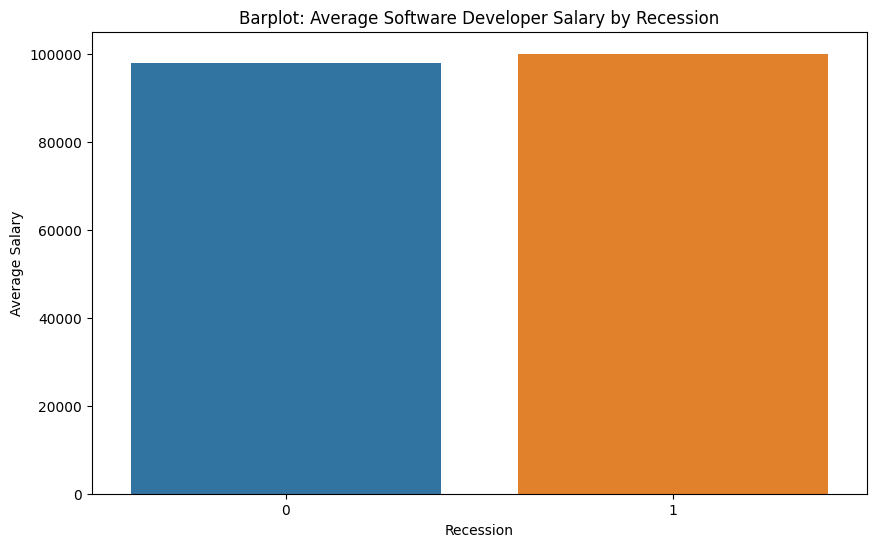

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Average Software Developer Salary', data=df, ci=None)
plt.title('Barplot: Average Software Developer Salary by Recession')
plt.xlabel('Recession')
plt.ylabel('Average Salary')
plt.show()

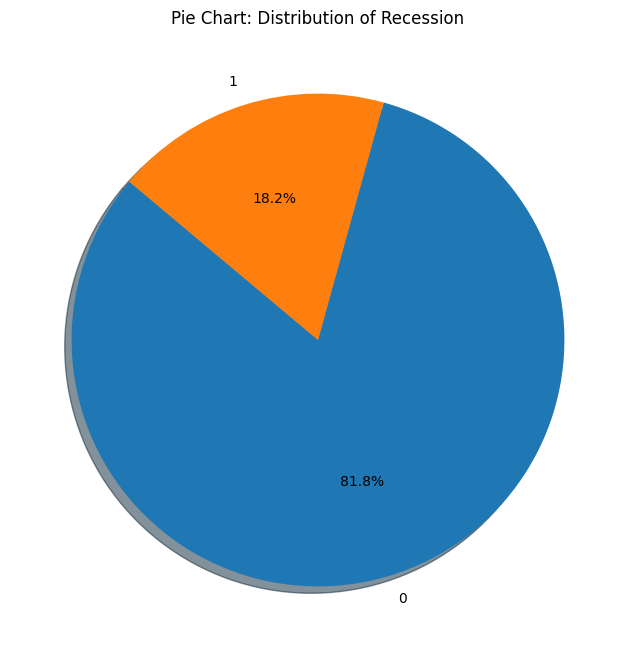

In [ ]:
recession_counts = df['Recession'].value_counts()
labels = recession_counts.index
sizes = recession_counts.values
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pie Chart: Distribution of Recession')
plt.show()

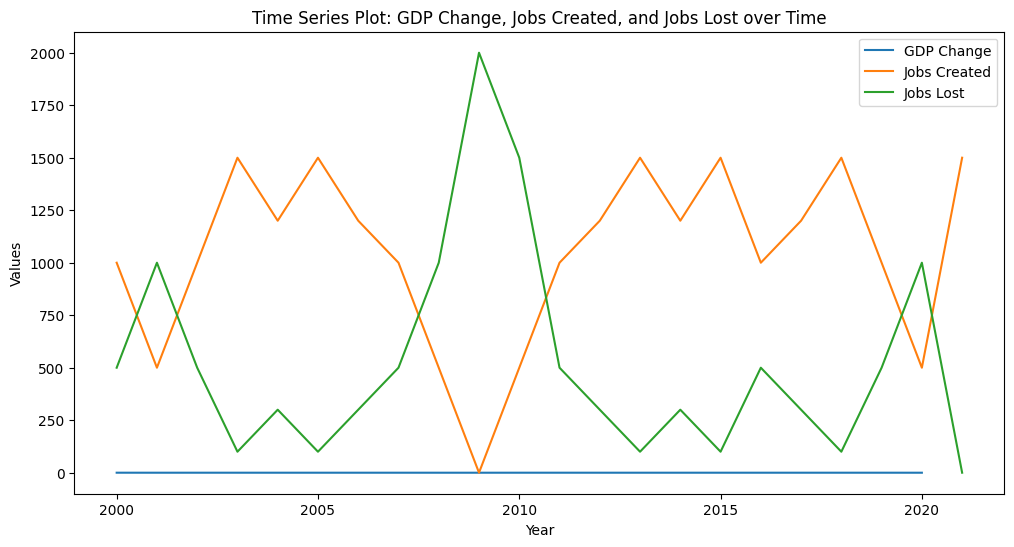

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Year'], y=df['Annual GDP Change'], label='GDP Change')
sns.lineplot(x='Year', y=df['Number of Software Jobs Created']/100, data=df, label='Jobs Created')
sns.lineplot(x='Year', y=df['Number of Software Jobs Lost']/100, data=df, label='Jobs Lost')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Time Series Plot: GDP Change, Jobs Created, and Jobs Lost over Time')
plt.legend()
plt.show()

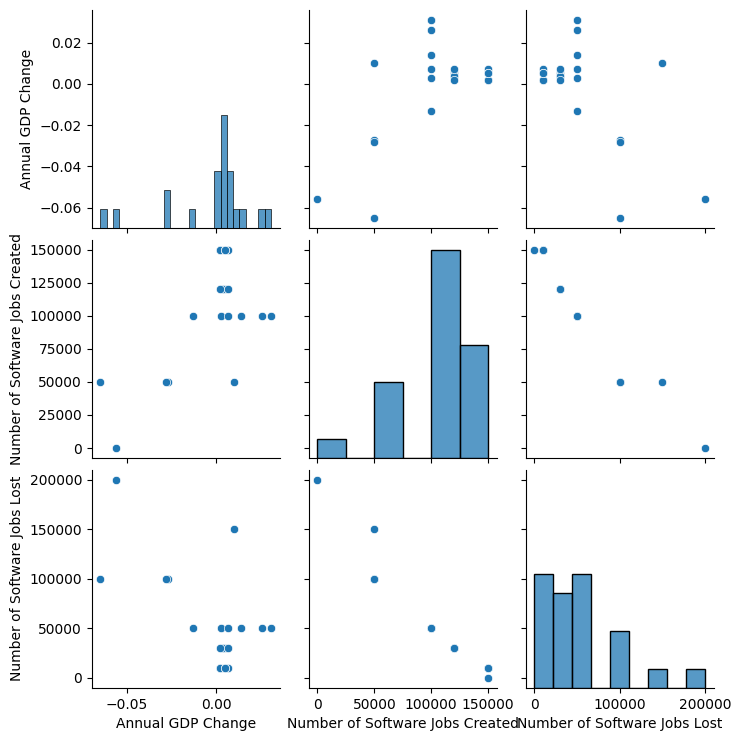

In [ ]:
sns.pairplot(df[['Annual GDP Change', 'Number of Software Jobs Created', 'Number of Software Jobs Lost']])
plt.show()

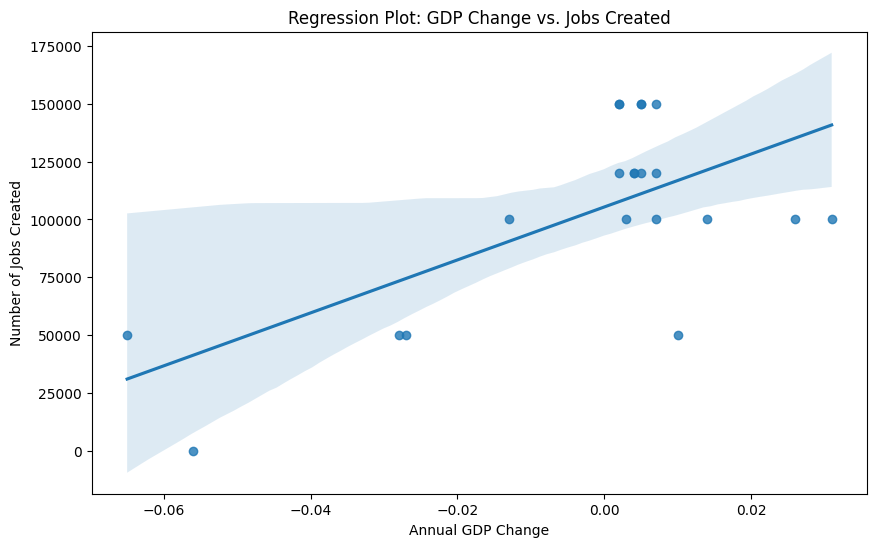

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Annual GDP Change', y='Number of Software Jobs Created', data=df)
plt.xlabel('Annual GDP Change')
plt.ylabel('Number of Jobs Created')
plt.title('Regression Plot: GDP Change vs. Jobs Created')
plt.show()

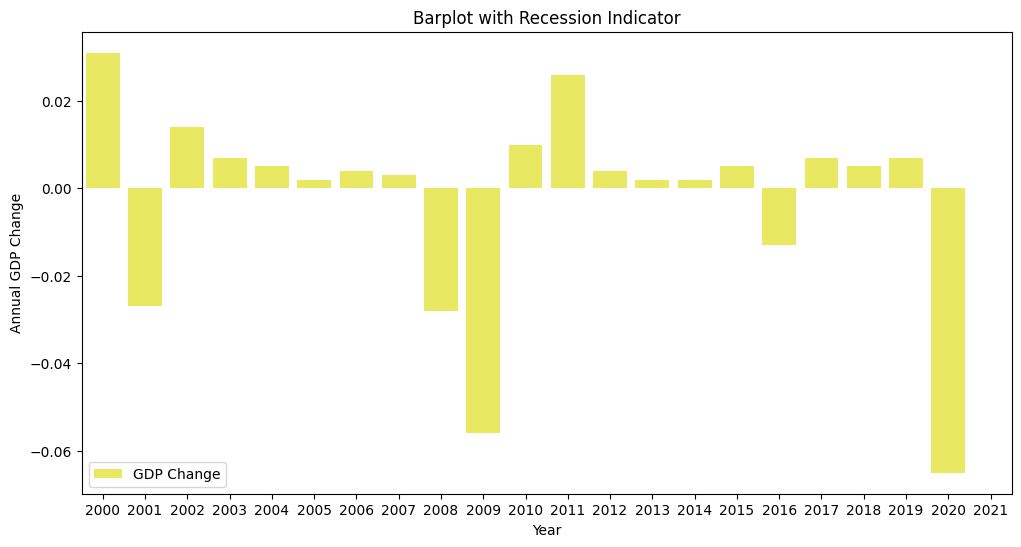

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Annual GDP Change', data=df, color='yellow', alpha=0.7, label='GDP Change')
#sns.scatterplot(x='Year', y='Recession', data=df, color='red', marker='o', label='Recession')
plt.xlabel('Year')
plt.ylabel('Annual GDP Change')
plt.title('Barplot with Recession Indicator')
plt.legend()
plt.show()

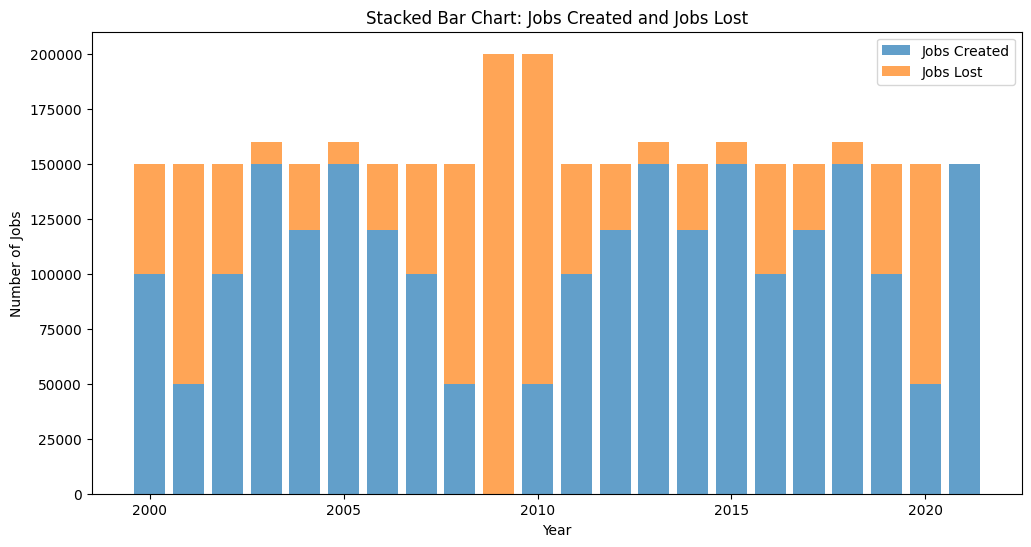

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df['Year'], df['Number of Software Jobs Created'], label='Jobs Created', alpha=0.7)
plt.bar(df['Year'], df['Number of Software Jobs Lost'], label='Jobs Lost', alpha=0.7, bottom=df['Number of Software Jobs Created'])
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.title('Stacked Bar Chart: Jobs Created and Jobs Lost')
plt.legend()
plt.show()


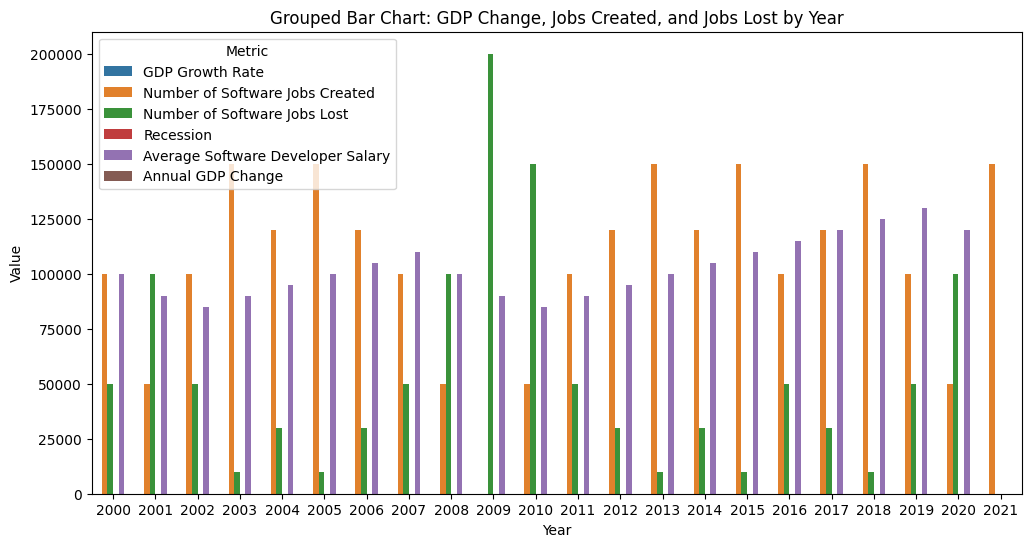

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Value', hue='Metric', data=df.melt(id_vars=['Year'], var_name='Metric', value_name='Value'))
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Grouped Bar Chart: GDP Change, Jobs Created, and Jobs Lost by Year')
plt.show()

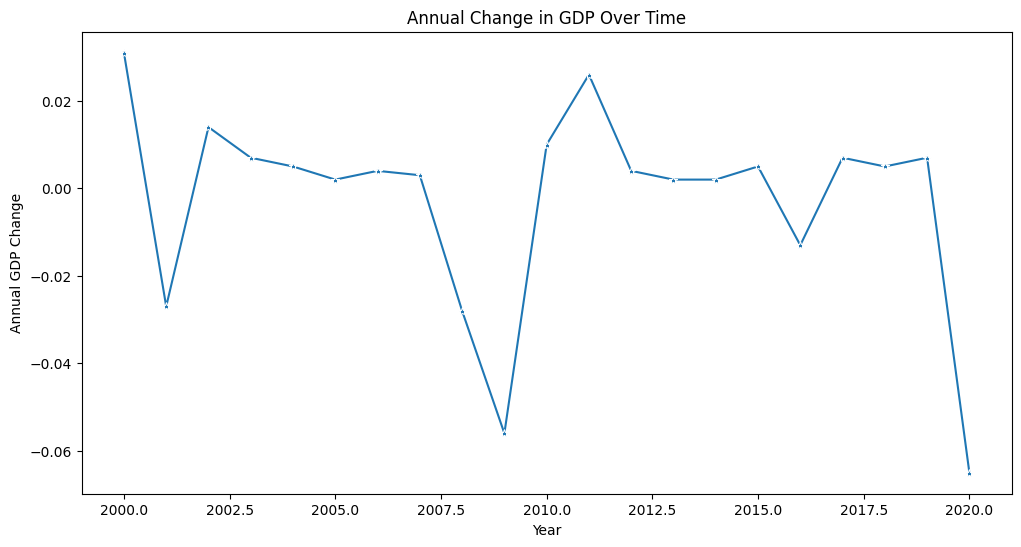

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Annual GDP Change',marker='*', data=df)
plt.xlabel('Year')
plt.ylabel('Annual GDP Change')
plt.title('Annual Change in GDP Over Time')
plt.show()

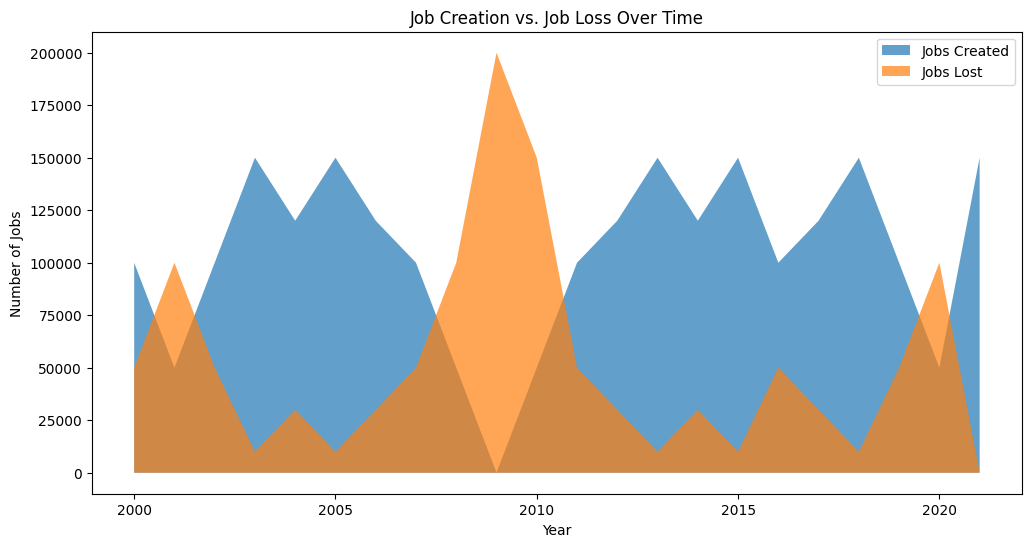

In [ ]:
plt.figure(figsize=(12, 6))
plt.fill_between(df['Year'], df['Number of Software Jobs Created'], label='Jobs Created', alpha=0.7)
plt.fill_between(df['Year'], df['Number of Software Jobs Lost'], label='Jobs Lost', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.title('Job Creation vs. Job Loss Over Time')
plt.legend()
plt.show()


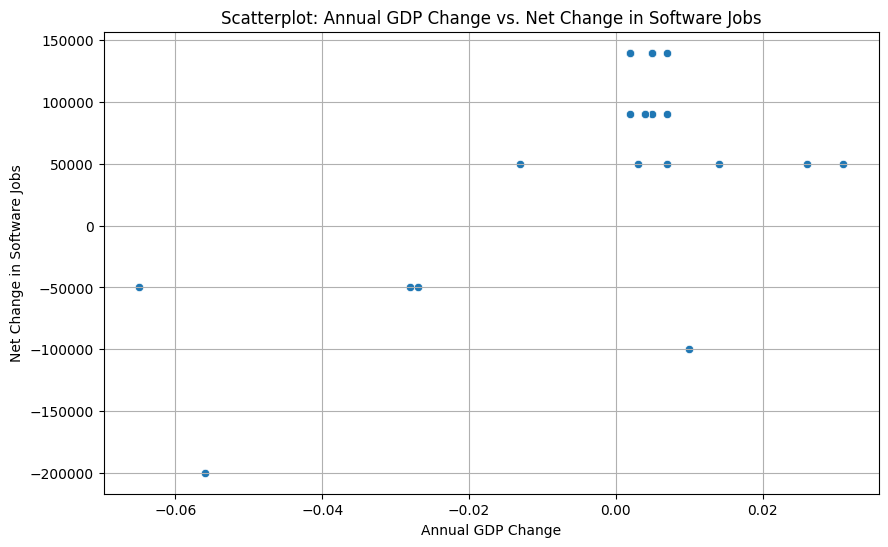

In [ ]:
df['Net Jobs Change'] = df['Number of Software Jobs Created'] - df['Number of Software Jobs Lost']

# Create a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual GDP Change', y='Net Jobs Change', data=df)
plt.xlabel('Annual GDP Change')
plt.ylabel('Net Change in Software Jobs')
plt.title('Scatterplot: Annual GDP Change vs. Net Change in Software Jobs')
plt.grid(True)
plt.show()